

# <center><font color = #2E5266>Correlation and Causation</font></center>

"Correlation doesn't imply causation." It's a cautionary phrase passed down to nearly every new scientist as they notice patterns in the world: just because two phenomena are related does not mean that one causes the other. 

In the age of "Big Data", advanced in storage technology and machine learning have allowed us to see more patterns than ever. What does this mean for establishing causality?

In this notebook, we will explore how modern thinkers approach questions of causality using the lens of data science. Then, we will critique a case study where scientists use large-scale data to answer a very topical question- is too much screen time corrupting America's youth?

***

First we will load some Python libraries to help us run the code we'll be using for this notebook! No need to edit or alter anything, just hit `shift` + `enter` to run it!

In [62]:
# This cell block just loads in helpful libraries that will help us run the code we need to!
from datascience import * # The data science library provides helpful tools for loading tables!
import matplotlib.pyplot as plt # This library will help us create plots!
%matplotlib inline
plt.rcParams["figure.figsize"] = [6,6] # make the plots bigger!
import seaborn as sns # This library will also help us create plots!
import ipywidgets as widgets # Allows for us to create interactive user interfaces where you won't have to code!
from ipywidgets import interact, fixed, Layout
import numpy as np # Mathematical functions
import os
import pandas as pd
from scipy.stats import pearsonr
!pip install xlrd

  Using cached https://files.pythonhosted.org/packages/b0/16/63576a1a001752e34bf8ea62e367997530dc553b689356b9879339cf45a4/xlrd-1.2.0-py2.py3-none-any.whl
You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


***
### <font color = #2E5266>Correlation and Causation: Review</font>


![XKCD correlation causation](https://imgs.xkcd.com/comics/correlation.png)
<center><i><a href='https://xkcd.com/552/'>"Correlation" by Randall Munroe</a></i></center>
    
<br>

When we talk about **correlation**, we're referring to an association or relationship between two variables. In statistics, correlation is also often used to refer to the _Pearson correlation coefficient_, or $r$, which measures the linear relationship between two variables.

As a reminder, $r$ can range from -1 to 1. 
- an $r$ value close or equal to 1 indicates a strong _positive_ linear correlation (i.e. as one variable increases, the other also tends to increase)
- an $r$ value of 0 indicates _no linear correlation_ 
- an $r$ value close or equal to -1 indicates a strong _negative_ linear correlation (i.e. as one variable increases, the other tends to decrease decreases)

The farther $r$ is from 0 in either direction, the more of a linear correlation there is.

**Causation**, on the other hand, is when one variable has an effect on another. In technical terms:
> X causes Y if and only if X and Y are correlated under interventions on X

That is, one variable causes another when a change in the first results in a change in the second when all other factors are the same.

The traditional method for establishing causality is the **randomized controlled trial (RCT)**, which does just that- keeps all variables constant save for one, the _treatment_, to see whether changing it has a measurable effect on the _outcome_. However, the randomized controlled trial isn't the answer to all our problems.

<div class="alert alert-info"><b>DISCUSSION (2 minutes)</b> Two reasons when an RCT may not be used to establish causality may be when:
    <ul>
        <li> an RCT is impractical</li>
        <li> an RCT is unethical </li>
    </ul>
    
With a partner, see if you can think of at least one real-life scenario for each of these cases. 
    </div>
    

***
### <font color = #2E5266>Causality in the Age of Big Data</font>

Let's now turn to the "big data" approach to looking for causal factors. Data science has two potentially game-changing tools at its disposal here.

First, data. In the last few decades, data storage has become very cheap and very accessible in large amounts, allowing individuals and corporations to collect and store vast amounts of data.

Second, machine learning methods enable data scientists to find patterns in these vast quantities of data that would be otherwise nearly impossible for a human to discover. And, as computing power increases, computers can find correlation more quickly than ever.

However, computers still have many limitations:
* they may only look for correlations that we tell them to. For example, we can tell a computer to look for high values of $r$, but that only measures _linear_ correlation. Variables may be correlated in other ways.
* they can't interpret contextual factors that affect our judgment about whether a relationship may be causal.

### <font color = #2E5266>Data Without Context: Example 1 </font>

To explore the benefits and limitations of data science for finding correlation and causation, let's work through a few examples.

Run the next cell to load some real-world data for our first example.

In [127]:
# run this cell to load our mystery data
%run scripts/utils.py

print("Data loaded!")

Data loaded!


<Figure size 432x432 with 0 Axes>

The following two cells show two mystery variables (creatively, we've called them `mystery_var1` and `mystery_var2`). Both variables represent real-world measurements collected every year between 2000 and 2009. Run the following two cells to look at the data.

In [87]:
# display the first mystery variable
mystery_var1

2000     9.331232
2001     9.701060
2002     9.660720
2003     9.652718
2004     9.938412
2005    10.193250
2006    10.517204
2007    11.024691
2008    10.573568
2009    10.627460
Name: 32, dtype: float64

In [72]:
# display the second mystery variable
mystery_var2

2000    480.0
2001    501.0
2002    540.0
2003    552.0
2004    547.0
2005    622.0
2006    655.0
2007    701.0
2008    712.0
2009    708.0
Name: 24, dtype: float64

Now, let's look at how these two variables might relate to one another. The next cell plots them on a scatter plot with a best-fit linear regression line. It also shows the value of $r$ and the p-value. The shaded blue area around the fit line is the 95% confidence interval for the regression estimate.

r =  0.9509548098376948
p = 2.38545595655013e-05


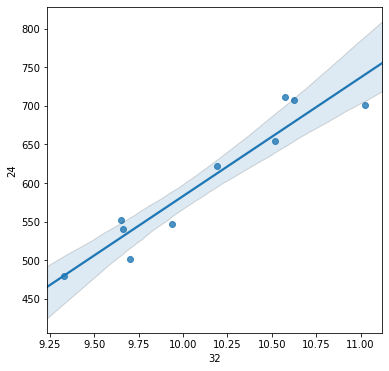

In [81]:
# plot the variables against one another on a scatter plot 
# and show the best-fit linear regression line, the coerrelation coefficient, and the p-value
sns.regplot(x=mystery_var1, y=mystery_var2);
print("r = ", pearsonr(mystery_var1, mystery_var2)[0])
print('p-value =', pearsonr(mystery_var1, mystery_var2)[1])

<div class="alert alert-info"> <b> DISCUSSION (1 minute)</b>
    <p>With only the given information, what can you say <i>scientifically</i> about the relationship between the two variables? (This is where you'll talk about things like the strength of the correlation, or the likelihood of seeing a result like this by random chance)</p>
    <p>Conversely, what would you say <i>intuitively</i> (i.e. if you threw statistics out the window and just looked at the graph)? If two real world variables have this kind of behavior, how do you feel in your gut about the chance they have something to do with one another, and the chance that one of them affects the other? </p>
    </div>

<br><br><br>

<center><b><u>SPOILERS</b></u></center>

<br><br><br>

In reality, the variables are:

<br><br><br>

1. `mystery_var1`: United States per-capital mozzerella cheese consumption (pounds)
2. `mystery_var2`: Number of civil engineering doctorates awarded in the United States

<div class="alert alert-info">How does your scientific reading of the variables' relationship change with the context? How does your intuitive reading change?</div>

This correlation came courtesy of Tyler Vigen's website ["Spurious Correlations"](https://www.tylervigen.com/spurious-correlations) (also an excellent procrastination destination). Vigen pulled the variables from a United States Department of Agriculture data set on food consumption and a National Science Foundation data set on doctorates. As we think about why this phenomenon occurred, it might help to look at all of the data in the original two sets.

In [144]:
# combine the two data sets into one table
all_data = pd.concat([engr_data.astype('float'), food_data])
all_data

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
All fields,41366.000000,40737.000000,40025.000000,40759.000000,42118.000000,43381.000000,45617.000000,48130.000000,48763.000000,49562.000000
Science and engineering,25966.000000,25529.000000,24608.000000,25283.000000,26275.000000,27985.000000,29866.000000,31806.000000,32832.000000,33470.000000
Science,20643.000000,20019.000000,19527.000000,20002.000000,20498.000000,21558.000000,22681.000000,24061.000000,24973.000000,25836.000000
Agricultural sciences,1037.000000,977.000000,1009.000000,1060.000000,1045.000000,1038.000000,1033.000000,1133.000000,1087.000000,1166.000000
Biological sciences,5853.000000,5694.000000,5695.000000,5696.000000,5942.000000,6366.000000,6649.000000,7187.000000,7798.000000,8026.000000
Biochemistry,776.000000,729.000000,781.000000,772.000000,703.000000,693.000000,784.000000,863.000000,898.000000,859.000000
Molecular biology,706.000000,711.000000,623.000000,615.000000,725.000000,724.000000,780.000000,701.000000,786.000000,763.000000
Neurosciences,495.000000,486.000000,491.000000,474.000000,584.000000,690.000000,741.000000,764.000000,884.000000,979.000000
Other biological sciences,3876.000000,3768.000000,3800.000000,3835.000000,3930.000000,4259.000000,4344.000000,4859.000000,5230.000000,5425.000000
Computer sciences,861.000000,830.000000,809.000000,867.000000,948.000000,1129.000000,1453.000000,1656.000000,1787.000000,1611.000000


Then, we can calculate the correlation coefficients for all of them. How much code did it take to do that, and how much time does it take the code cell to run?

In [140]:
# calculate the correlation coefficient for all agricultural and food variables
# don't worry about understanding this code!
all_corr = all_data.transpose().corr().iloc[:engr_data.shape[0], engr_data.shape[0]:]
all_corr

,"Red meat, total (boneless, trimmed weight) \1, \2",..Beef,..Veal,..Lamb and mutton,..Pork,"Poultry (boneless, trimmed weight) \2",..Chicken,..Turkey,"Fish and shellfish (boneless, trimmed weight)",Eggs,...,..Oat products,..Barley products,"Caloric sweeteners, total \10","..Sugar, refined cane and beet",..Corn sweeteners \11,....High fructose corn syrup,..Cocoa beans,..Coffee (green beans),..Peanuts (shelled),..Tree nuts (shelled)
All fields,-0.877075,-0.810490,-0.892725,-0.782644,-0.714037,0.353624,0.367566,-0.257369,0.313475,-0.629882,...,0.711189,-0.130388,-0.911353,0.072525,-0.961655,-0.950293,0.262568,-0.289730,0.477825,0.510584
Science and engineering,-0.892859,-0.818239,-0.886369,-0.805840,-0.743558,0.336236,0.352112,-0.268427,0.285017,-0.637563,...,0.696737,-0.128514,-0.900701,0.110082,-0.962188,-0.950642,0.269444,-0.293931,0.468741,0.479667
Science,-0.900747,-0.844159,-0.850242,-0.824534,-0.711962,0.261210,0.279087,-0.258718,0.239438,-0.690489,...,0.657328,-0.076660,-0.899773,0.148538,-0.972549,-0.964350,0.216311,-0.293161,0.440800,0.486294
Agricultural sciences,-0.683806,-0.774925,-0.686958,-0.595661,-0.241039,0.201049,0.215474,-0.205152,0.368786,-0.653444,...,0.576855,0.170214,-0.883436,-0.177488,-0.856183,-0.863544,0.034154,-0.243191,0.456677,0.612508
Biological sciences,-0.913790,-0.864349,-0.852819,-0.834896,-0.705553,0.262829,0.277553,-0.230776,0.234110,-0.705212,...,0.679187,-0.060851,-0.900665,0.173107,-0.980425,-0.975240,0.154178,-0.355374,0.443332,0.512275
Biochemistry,-0.602269,-0.618058,-0.502401,-0.486598,-0.366440,0.045316,0.005618,0.342581,0.046966,-0.780558,...,0.521256,-0.233371,-0.664218,0.214148,-0.749425,-0.712756,-0.284522,-0.196710,-0.051386,0.575864
Molecular biology,-0.710986,-0.515763,-0.647805,-0.764894,-0.891882,0.227560,0.273258,-0.498103,0.114102,-0.297934,...,0.378933,-0.096907,-0.504031,0.387636,-0.637123,-0.641453,0.600661,0.004102,0.446216,0.080517
Neurosciences,-0.922517,-0.850384,-0.905039,-0.869740,-0.756218,0.350213,0.379488,-0.394914,0.317363,-0.574334,...,0.688644,-0.064129,-0.909122,0.110108,-0.971229,-0.970523,0.269936,-0.403825,0.567819,0.484395
Other biological sciences,-0.908658,-0.875232,-0.843278,-0.818678,-0.667725,0.248660,0.261381,-0.207391,0.227447,-0.729744,...,0.680309,-0.033706,-0.906190,0.156277,-0.980621,-0.977048,0.117947,-0.370598,0.434429,0.522239
Computer sciences,-0.840700,-0.746942,-0.904040,-0.741051,-0.747003,0.462643,0.464207,-0.185750,0.369384,-0.557221,...,0.770260,-0.232818,-0.875370,0.057042,-0.920906,-0.899078,0.276654,-0.277482,0.458688,0.502708


It might be easier to interpret as a visualization. The next cell makes a heat map of all the correlations. Stronger correlations are darker, weaker correlations are lighter. Positive correlations are green, and negatives are yellow.

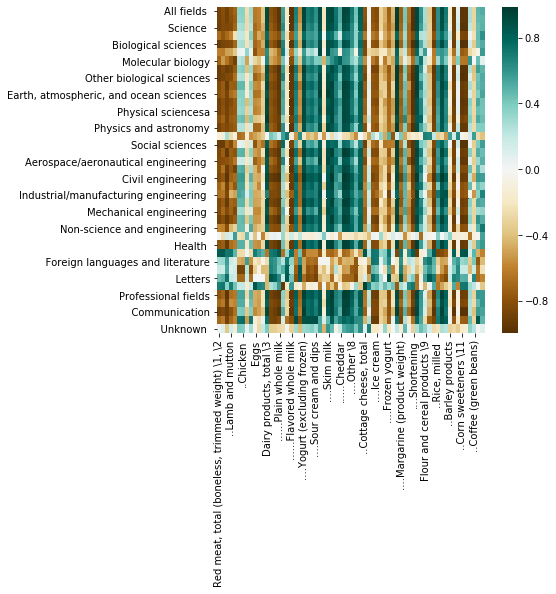

In [146]:
# create a heatmap of the correlation values for the engineering and agricultural data
sns.heatmap(all_corr, cmap="BrBG");

### <font color = #2E5266>Data Without Context: Example 2 </font>

Here's another example to explore. 

We have two variables, $x$ and $y$, with no context. However, we do have a lot of statistical information about them:

| statistic                   | value |
|-----------------------------|-------|
| mean x                      | 54.3  |
| standard deviation x        | 16.7  |
| mean y                      | 47.8  |
| standard deviation y        | 26.8  |
| correlation coefficient (r) | -0.1  |
| p-value                     | 0.4   |

<div class="alert alert-info"> Based on these statistics, try sketching out what this data set might look like. Then, run through the same thought exercise as we did for the last data set. What would a scientist say about the data from these statistics alone? Alternately, as an intuitive human, what kinds of things do you think these variables could represent in the real world, and do you think those things have a relationship (causal or otherwise)? </div>

The next cell creates a widget to visualize $x$ and $y$; in fact, it can show twelve possible versions of the two variables. Click through the different buttons to show different iterations, and keep an eye on the summary statistics for each $x$ and $y$.

In [153]:
# create the widget
%run scripts/utils.py

# create the sliders for the widget
dataset_selection_widget = widgets.ToggleButtons(options=range(1, 14))

# create the widget to view plots for different parameter values
interact(analyze_data, dataset_num=dataset_selection_widget);


<Figure size 432x432 with 0 Axes>

interactive(children=(ToggleButtons(description='dataset_num', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,…

<div class="alert alert-info"> What do you think now about how what these data represent in the real world? What do you base that on? How could a computer come to the same conclusions?</div>


## <font color = #2E5266>Case Study: Adolescent Health vs. Screen Time</font>

 <img src="https://get.pxhere.com/photo/laptop-computer-typing-man-people-girl-woman-technology-boy-male-guy-female-young-tablet-sitting-communication-gadget-furniture-leisure-sofa-holding-couch-electronic-conversation-research-relaxing-product-design-students-legs-break-cropped-studying-learning-casual-searching-touch-screen-using-free-image-browsing-pastime-digital-devices-1373622.jpg" alt="teens on laptops" style="width:500px;height:300px;"> 
At this point, we've examined some of the ways data scientists work with and think about correlation and causality.

The next section will walk through a case study where scientists used a large, complex data set to try to gather evidence about correlation and causation for a very topical question: whether increased TV or computer usage is harming America's youth.

### <font color = #2E5266>Getting Started with the Data</font>

These data come from the United States Center for Disease Control (CDC)'s [Youth Risk Behavior Survey (YRBS)](https://www.cdc.gov/healthyyouth/data/yrbs/data.htm). From their website:

> "The YRBSS was developed in 1990 to monitor health behaviors that contribute markedly to the leading causes of death, disability, and social problems among youth and adults in the United States...From 1991 through 2017, the YRBSS has collected data from more than 4.4 million high school students in more than 1,900 separate surveys. "

[You can see the YRBS questionnaire content at this link.](https://www.cdc.gov/healthyyouth/data/yrbs/pdf/2017/YRBS_questionnaire_content_1991-2017.pdf) 

<div class="alert alert-info"> <b> DISCUSSION</b>
    <p> When trying to determine causal factors, do you think it's useful to do this kind of large-scale survey analysis? Why or why not? What other methodologies might be effective in investigating this topic?</div>
    
Run the cell below to load the data.

In [155]:
# The command below takes in a .csv file and converts it into a table!
raw_data = Table.read_table("data/yrbs_clean.csv", index_col=0)
# This command allows for us to see only a sneak-peek of the entries.
# Instead of seeing hundreds of rows, we will see only five.
raw_data.show(5)

tv use,computer/video game use,soda drinking,grades,seat belt use,sunscreen use,depression,sexual partners (lifetime),strength training,hours of sleep,asthma,fights,current tobacco,text/email while driving,weight
1,3,3,2,5,nan,0,0,4,7,2,1,1,2,1.3041
3,nan,2,1,5,nan,1,2,4,6,2,2,1,2,0.2672
4,nan,nan,nan,5,nan,1,0,4,8,2,1,1,1,0.7263
0.5,nan,2,2,4,nan,0,0,4,7,3,3,1,1,0.3991
4,3,5,1,5,nan,0,6,8,7,2,1,1,nan,0.3695


Each row represents one survey completed by an American teenager between 2007 and 2017. Each column represents information about the person surveyed.

The dataset you see above has been changed from the source data in a few ways:

* most columns have been removed for simplicity. The original survey had 89 questions, plus a few dozen more columns of derived variables, demographics, and sample data
* columns have been renamed for clarity (e.g. "q80" is now "tv use")
* some values have been recoded (e.g. "hours of sleep" changed from a 0-6 scale to the actual number of hours slept)
* data before 2007 was dropped in order to make the data manageable on Berkeley's cloud infrastructure

An essential part of data science is getting familiar with the **metadata** and **data dictionaries**, which give information about what the different variables and values mean and how they were collected.

For our purposes, please check out the [YRBS Methodology](https://www.cdc.gov/mmwr/pdf/rr/rr6201.pdf). Reading the full document is probably more than needed for this assignment, but we recommend looking over:
* Sample, Weighting, and Response Rates (National subheading, page 11)
* Data Collection Protocols (page 13)
* Limitations (page 19)

The [full YRBS User Guide](https://www.cdc.gov/healthyyouth/data/yrbs/pdf/2017/2017_yrbs_sadc_documentation.pdf) is 93 pages and can be viewed at the link (though reading the entire guide is unnecessary for this notebook). 

<div class="alert alert-info"> <b> DISCUSSION</b>
    <p>What potential sources of confounding or bias might this study be prone to, and how did the researchers and survey designers attempt to mitigate them?</p>
</div>

### Vis and metrics

- bar chart widget
- regplot widget
- correlation metric

play with variables, plot types. collect observations and discuss.

### <font color = #2E5266>Bonus: What if the dataset is reeeeeally big?</font>

Can we do without  a RCT if dataset is big enough?

https://www.textbook.ds100.org/ch/02/design_srs_vs_big_data.html

https://statistics.fas.harvard.edu/files/statistics-2/files/statistical_paradises_and_paradoxes.pdf

### Conclusion
- takeaways

## Citations

- https://www.autodeskresearch.com/publications/samestats
- data https://www.cdc.gov/healthyyouth/data/yrbs/data.htm
- study 1 https://journals.sagepub.com/doi/10.1177/2167702617723376
- https://www.tylervigen.com/spurious-correlations
- study 2 https://www-nature-com.libproxy.berkeley.edu/articles/s41562-018-0506-1
- Centers for Disease Control and Prevention. 2007-2017 Youth Risk Behavior Survey Data. Available at: www.cdc.gov/yrbs. Accessed on 1/7/2020.

Notebook author: Keeley Takimoto